### Soraya J Labranche **** Final Tutorial Milestone 2 **** Health Expenditure, Food Environment, State Budgets

<a href="https://github.com/jemyjunes/DataScience-SJL-Final-Tutorial"><sorayajlabranche@github.io>

In [1]:
import pandas as pd

# Load individual sheets as separate dataframes
stores_data = pd.read_excel('FoodEnvironmentAtlas.xls', sheet_name='STORES')
restaurants_data = pd.read_excel('FoodEnvironmentAtlas.xls', sheet_name='RESTAURANTS')
health_data = pd.read_excel('FoodEnvironmentAtlas.xls', sheet_name='HEALTH')
access_data = pd.read_excel('FoodEnvironmentAtlas.xls', sheet_name='ACCESS')

# Process each dataframe, group by 'State' and 'County', and calculate mean values (as an example)
stores_summary = stores_data.groupby(['State', 'County']).mean().reset_index()
restaurants_summary = restaurants_data.groupby(['State', 'County']).mean().reset_index()
health_summary = health_data.groupby(['State', 'County']).mean().reset_index()
access_summary = access_data.groupby(['State', 'County']).mean().reset_index()

stores_summary = stores_summary.dropna(axis=1, how='all')
restaurants_summary = restaurants_summary.dropna(axis=1, how='all')
health_summary = health_summary.dropna(axis=1, how='all')
access_summary = access_summary.dropna(axis=1, how='all')

# Save intermediary results to CSV files
stores_summary.to_csv('stores_summary.csv', index=False)
restaurants_summary.to_csv('restaurants_summary.csv', index=False)
health_summary.to_csv('health_summary.csv', index=False)
access_summary.to_csv('access_summary.csv', index=False)


stores_summary = pd.read_csv('stores_summary.csv')
restaurants_summary = pd.read_csv('restaurants_summary.csv')
health_summary = pd.read_csv('health_summary.csv')
access_summary = pd.read_csv('access_summary.csv')

# Combine the summaries by merging on both 'State' and 'County'
final_summary = pd.merge(stores_summary, restaurants_summary, on=['State', 'County'], how='inner', suffixes=('_stores', '_restaurants'))
final_summary = pd.merge(final_summary, health_summary, on=['State', 'County'], how='inner', suffixes=('', '_health'))
final_summary = pd.merge(final_summary, access_summary, on=['State', 'County'], how='inner', suffixes=('', '_access'))


In [2]:
final_summary.head()

,State,County,FIPS_stores,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,AK,Aleutians East,2013.0,4.0,4.0,0.000000,1.226242,1.203369,-1.865223,0.0,...,280.000003,8.914359,787.999992,25.087551,515.999996,16.427889,17.000000,0.541229,163.999999,5.221267
1,AK,Aleutians West,2016.0,3.0,4.0,33.333333,0.536961,0.696015,29.621252,0.0,...,68.210761,1.226592,202.293689,3.637721,595.460899,10.707803,7.424557,0.133511,97.709319,1.757046
2,AK,Anchorage,2020.0,32.0,33.0,3.125000,0.108002,0.110971,2.748740,9.0,...,5557.705074,1.904459,5615.873556,1.924391,4872.123999,1.669530,844.011828,0.289217,7178.471845,2.459847
3,AK,Bethel,2050.0,23.0,23.0,0.000000,1.320625,1.279199,-3.136819,0.0,...,75.038312,0.441065,28.793035,0.169241,10355.551619,60.868463,5.890231,0.034622,364.197642,2.140702
4,AK,Bristol Bay,2060.0,3.0,2.0,-33.333333,2.912621,2.209945,-24.125230,0.0,...,24.000000,2.407222,8.000000,0.802407,334.000003,33.500502,3.000000,0.300903,170.999998,17.151454


In [3]:

selected_columns_df = final_summary[['County', 'State','FFR11', 'FFR16', 'PCH_FFR_11_16', 'FFRPTH11', 'FFRPTH16', 
    'PCH_FFRPTH_11_16', 'FSR11', 'FSR16', 'PCH_FSR_11_16', 'FSRPTH11', 'FSRPTH16', 
    'PCH_FSRPTH_11_16', 'PCT_DIABETES_ADULTS08', 'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS12', 
    'PCT_OBESE_ADULTS17', 'FSR16', 'PCH_FSR_11_16', 'FSRPTH11', 'FSRPTH16']].copy()

selected_columns_df.head()

,County,State,FFR11,FFR16,PCH_FFR_11_16,FFRPTH11,FFRPTH16,PCH_FFRPTH_11_16,FSR11,FSR16,...,FSRPTH16,PCH_FSRPTH_11_16,PCT_DIABETES_ADULTS08,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS12,PCT_OBESE_ADULTS17,FSR16,PCH_FSR_11_16,FSRPTH11,FSRPTH16
0,Aleutians East,AK,1.0,1.0,0.000000,0.306560,0.300842,-1.865223,0.0,1.0,...,0.300842,NaN,5.5,7.6,25.7,34.2,1.0,NaN,0.000000,0.300842
1,Aleutians West,AK,2.0,0.0,-100.000000,0.357974,0.000000,-100.000000,2.0,4.0,...,0.696015,94.431878,5.9,6.2,25.7,34.2,4.0,100.000000,0.357974,0.696015
2,Anchorage,AK,201.0,208.0,3.482587,0.678387,0.699451,3.105023,222.0,247.0,...,0.830598,10.855316,7.0,7.0,25.7,34.2,247.0,11.261261,0.749263,0.830598
3,Bethel,AK,7.0,6.0,-14.285714,0.401929,0.333704,-16.974416,6.0,6.0,...,0.333704,-3.136819,5.5,5.8,25.7,34.2,6.0,0.000000,0.344511,0.333704
4,Bristol Bay,AK,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.0,2.0,...,2.209945,13.812155,6.8,8.5,25.7,34.2,2.0,0.000000,1.941748,2.209945


In [4]:

# Define the custom NA values and the path to your CSV file
na_values = ["", " ", -9999]
file_path = 'MEDICAID_AGGREGATE20.CSV'  
columns_to_use = ['Item', 'Group','Region_Number',	'Region_Name',	'State_Name','Y2009', 'Y2010', 'Y2011','Y2012', 'Y2013', 'Y2014','Y2015', 'Y2016', 'Y2017','Y2018', 'Y2019', 'Y2020'] 

# Load the data from the CSV file
df_medicaid = pd.read_csv(file_path, na_values=na_values, usecols=columns_to_use)

# Check for missing values in the dataset
missing_values = df_medicaid.isnull().sum()

# Check the percentage of missing data in each column
missing_percentage = df_medicaid.isnull().mean() * 100

# For columns with a small percentage of missing values, fill them with the column's mean (for numerical data)
# or the mode (for categorical data)
for column in df_medicaid.columns:
    if df_medicaid[column].dtype == 'float64' or df_medicaid[column].dtype == 'int64':
        df_medicaid[column].fillna(df_medicaid[column].mean(), inplace=True)
    else:
        df_medicaid[column].fillna(df_medicaid[column].mode()[0], inplace=True)

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'MEDICAID_AGGREGATE20_CLEANED.CSV' 
df_medicaid.to_csv(cleaned_file_path, index=False)

df_medicaid = df_medicaid.rename(columns={'State_Name': 'State'})

df_medicaid.head()

,Item,Group,Region_Number,Region_Name,State,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,Medicaid/Personal Health Care (Millions of Dol...,United States,0,United States,Alabama,346347,365707,373684,388256,405666,446921,484506,503382,516067,531782,552953,586914
1,Medicaid/Personal Health Care (Millions of Dol...,Region,1,New England,Alabama,23289,23383,23833,25512,26113,28519,30368,31616,31577,32910,32767,34183
2,Medicaid/Personal Health Care (Millions of Dol...,Region,2,Mideast,Alabama,81156,84403,88672,87340,88864,97912,103253,109981,117574,122226,123410,125408
3,Medicaid/Personal Health Care (Millions of Dol...,Region,3,Great Lakes,Alabama,49395,51876,49726,52941,56964,62039,66741,68168,70092,70563,74817,83497
4,Medicaid/Personal Health Care (Millions of Dol...,Region,4,Plains,Alabama,22251,23101,24117,25535,26266,27973,29466,30255,31077,32582,33444,34551


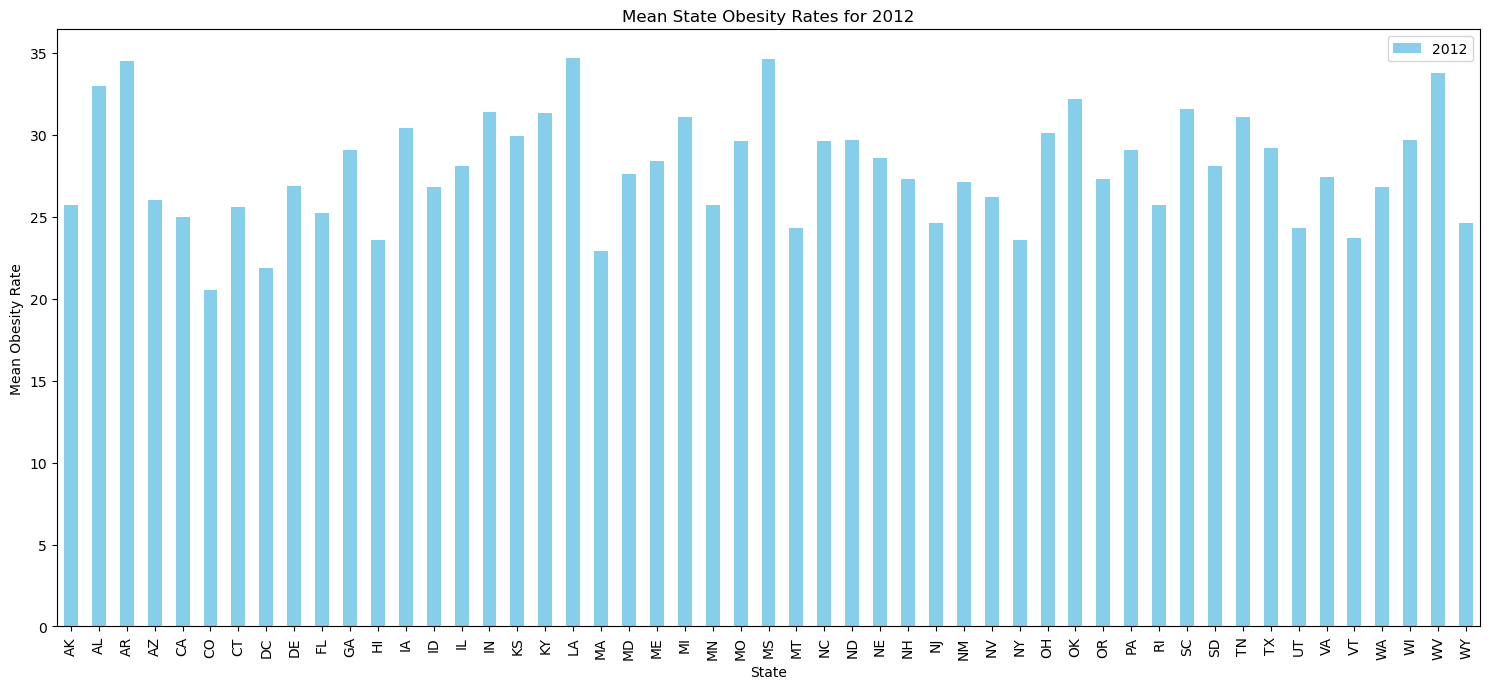

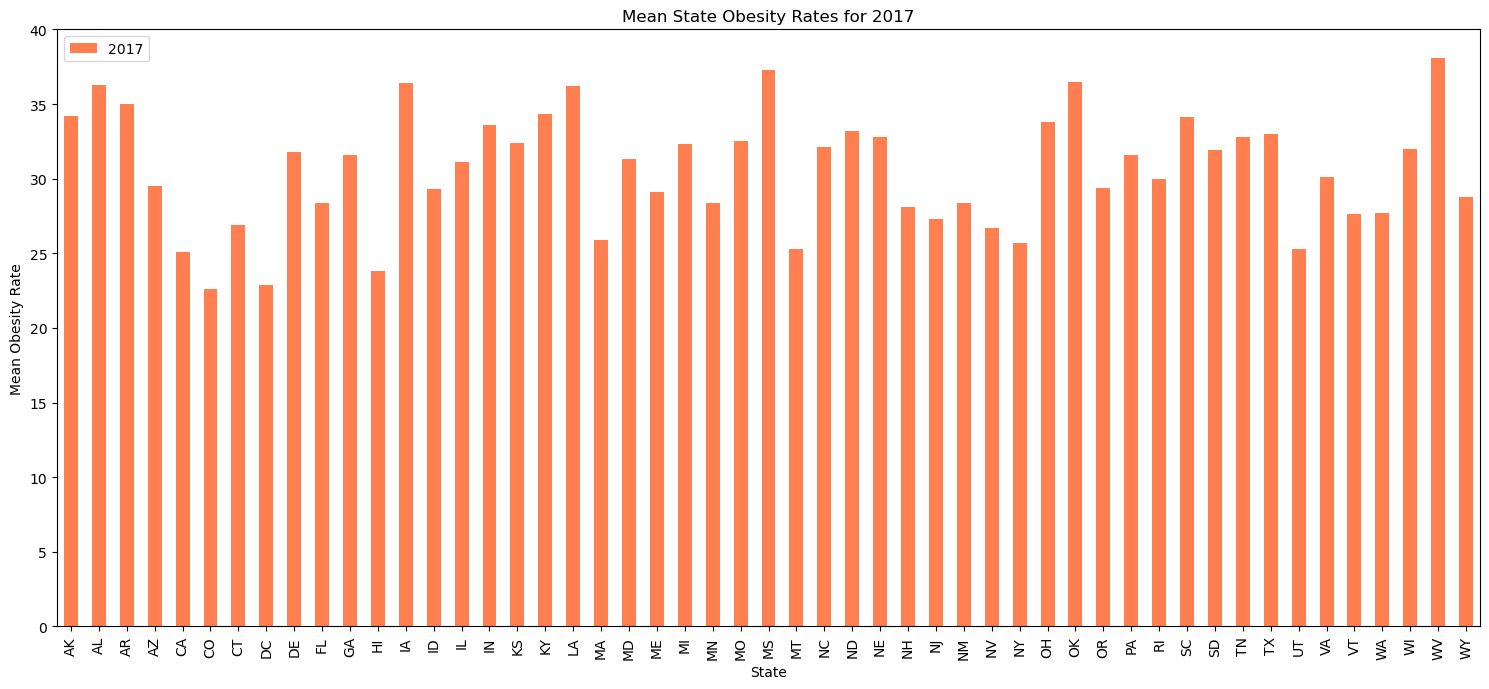

In [5]:
import matplotlib.pyplot as plt

# Assuming 'selected_columns_df' is your DataFrame with the required data.
# Group by State and calculate the mean obesity for 2012 and 2017
mean_obesity_2012 = selected_columns_df.groupby('State')['PCT_OBESE_ADULTS12'].mean()
mean_obesity_2017 = selected_columns_df.groupby('State')['PCT_OBESE_ADULTS17'].mean()

# Create a bar plot for 2012
plt.figure(figsize=(15, 7))
mean_obesity_2012.plot(kind='bar', color='skyblue', label='2012')
plt.xlabel('State')
plt.ylabel('Mean Obesity Rate')
plt.title('Mean State Obesity Rates for 2012')
plt.legend()
plt.xticks(rotation=90)  # Rotate the state abbreviations for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

# Create a separate bar plot for 2017
plt.figure(figsize=(15, 7))
mean_obesity_2017.plot(kind='bar', color='coral', label='2017')
plt.xlabel('State')
plt.ylabel('Mean Obesity Rate')
plt.title('Mean State Obesity Rates for 2017')
plt.legend()
plt.xticks(rotation=90)  # Rotate the state abbreviations for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


## Possible Questions to Answer
Trends Over Time:

How has the number of stores/facilities (or whatever the counts represent) changed over time?
Are there any visible trends in health expenditure over the same time peio

ds?
Comparative Analysis:

Are there any correlations between the change in counts (e.g., of stores, facilities) and changes in health expenditure?
How do the ratios or rates compare across diffrent r

egions?
Geogaphic P
tterns:

Which regions have seen the most significant increase/decrease in these metrics?
Are there geographic patterns to the health expenditure data that correlae with the

se changes?
Impact Analysis:

Is there any indication that changes in these metrics have an impact on health outcomes or health expweiture?
Can you identify regions with outlier values in both health-related statistics and expenditure, suggesting either particularly effiient or ineffi

cient spending?
Regression Analysis:

Can you predict health expenditure based on the provided statistics using re
gression analysis?
Health and Economy:

Does higher/lower health expenditure correlate with the economic indicators provided (like the number of sto

Cost-Effectiveness and C
ost-Benefit Analysis:
Does state budget allocation have an effect on health expenditure and food access? 
How can budget funds be realocated to have optimmal conditions in different states?
How are/Can different factors of food environment be an indication of state health, or is that an indication of poor budgeting on the state's end?res or growth rates)?

## Possible Models 

Causal Inference Model:
Propensity Score Matching: Evaluate the effects of specific interventions (like budget increases for health) on health outcomes by matching areas with similar characteristics.

Clustering Models:
Segmentation Analysis: Group regions into clusters based on similar characteristics to identify patterns or to tailor region-specific policies.
     
        Clustering is useful when you want to find natural groupings in your data. If regions have various characteristics (like socioeconomic status, population density, etc.), clustering can help identify regions with similar profiles.        
This can be useful for policy-making, as it allows for tailoring interventions to the specific needs of each cluster, potentially making policies more effective and resource-efficient.

Resource Allocation Models:
Optimization Models: Develop models to optimize the allocation of resources (like health budgets) to improve health outcomes or access to food

        Can help to determine the best way to distribute resources to maximize some objective (like improving health outcomes) or to minimize costs while still achieving a certain level of outcome.d.s.
cs.

<a href="https://budget.acgov.org/Home/Documents"><Possible 3rd Dataset>